### tests :

We would like to know why the algorithm calculates a lot of states near the intermediary states. 

Ideas: 
   - plot the fidelity towards the intermediary state. We will have 3 plots in the case where we have 
    3 intermediary states.
    
   - plot $\lambda$ vs time

In this notebook, we are searching a usecase for intermediary states. This mean that we would like to find a trajectory with intermediary states that follows the geodesic in a better way than a continuos trajectory

## Setup 3 with Python code

Without and with intermediary states.
At the end, one will find the plots comparing both results.

In [1]:
# libraries
import numpy as np
import matplotlib as mpl
from matplotlib import cm
#from sympy.solvers import solve
#from sympy import Symbol
#
#from scipy.optimize import minimize
#from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import axes3d

import qutip


from contrlwgeo import geodesic
from contrlwgeo import fidelity
from contrlwgeo.pauli_mat_vec import *
from contrlwgeo.utils import delete_less_than_k
from contrlwgeo.controlSetup3 import control1setup3,control1setup3_int_states
from contrlwgeo.getTimeFidelity import get_time_fidelity


%matplotlib widget
#

Control activated and ready to use


In [2]:
## this cell is to have nice plots
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
# test
#vect1= np.array([0.0,0.0,0.99])
#vect2= np.array([0.99,0.0,0.0])
#geodesic(0.5,vect1,vect2)

In [4]:
# Test values
#qsri = 1/np.sqrt(3)*np.array([1.0, 1.0, 0.9])
#qssf = np.array([0.0, 0.9, 0.0])
qsri = 1/np.sqrt(3)*np.array([0.0, 0.0, 0.99])
qssf = 1/np.sqrt(3)*np.array([0.99, 0.0, 0.0])
w0 = 5.0
gamma_0 = 0.01
gamma_c = 10
Nmax = 40
imax = 7
deltat = 0.0030

# Save initial and final states
auxri = qsri
auxsf = qssf

In [5]:
## testing cell
estadoslist, tiempolists, solution, vec_lambda = control1setup3(qsri,qssf,Nmax=Nmax,deltat=deltat)
#tiempolists
#vec_lam
len(tiempolists)

39

In [6]:
## testing cell

finalestados, finaltiempotot, list_lambda_time=get_time_fidelity(estadoslist,tiempolists,solution,imax,qssf)
###
# take account that the bigger imax the better the fidelity. But the improvement in the fidelity 
# is very small

print(len(finalestados))
print(len(finaltiempotot))

Find time with fidelity
New quantum state [5.70786646e-01 5.41791673e-04 7.05525632e-07]
Find time with fidelity
New quantum state [ 5.70786129e-01  2.72449310e-04 -1.07295823e-07]
Find time with fidelity
New quantum state [5.70785443e-01 1.39459758e-04 8.95249469e-08]
Find time with fidelity
New quantum state [5.70786564e-01 6.14662055e-05 3.94784323e-07]
Find time with fidelity
New quantum state [5.70786678e-01 2.87458705e-05 5.41162762e-07]
Find time with fidelity
New quantum state [5.70786717e-01 1.29118089e-05 6.13457474e-07]
Find time with fidelity
New quantum state [5.70786735e-01 5.16324853e-06 6.48977456e-07]
46
46


In [7]:
list(finalestados[30])[1]

0.11304917939965044

In [8]:
list_lambda_time

[56802.6919754144,
 87498.7884765970,
 107774.884162520,
 116859.725823741,
 118797.003876168,
 119231.335582991,
 119318.278431889]

In [9]:
# radius
radius = [np.sqrt((finalestados[i][0])**2+(finalestados[i][1])**2+(finalestados[i][2])**2) for i in range(len(finalestados))]
listfidelities=[fidelity(finalestados[i],qssf) for i in range(len(finalestados))]

In [10]:
### plots

### bloch sphere
length = 1
nrm = mpl.colors.Normalize(0,length)
#colors = cm.winter(nrm(range(length))) # options: cool, summer, winter, autumn etc.
colors = cm.winter(range(length)) # options: cool, summer, winter, autumn etc.

b = qutip.Bloch(view=[170,50],figsize=[3,3])
b.sphere_alpha=0.2
b.point_color = ['r'] # options: 'r', 'g', 'b' etc.
b.point_marker = ['o']
b.point_size = [20]
for i in range(len(finalestados)):
    b.add_points(finalestados[i])
    
## ploting geodesic
Numbergeo = 250
geolist = [geodesic(t/Numbergeo,qsri,qssf) for t in range(Numbergeo+1)]
colors2 = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

vectorgeo = [bloch_vector(rho) for rho in geolist]
#b.point_color = ['b'] # options: 'r', 'g', 'b' etc.
#b.point_marker = ['*']
#b.point_size = [20]
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
    b.add_points(vectorgeo[i])

#b.add_points(auxri)
#b.add_points(auxsf)
newbloch=qutip.Bloch(view=[170,50],figsize=[3,3])
newbloch.point_color = ['b'] # options: 'r', 'g', 'b' etc.
newbloch.point_marker = ['*']
newbloch.point_size = [20]
newbloch.sphere_alpha=0.01
newbloch.frame_alpha=0.01
#newbloch.
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.

    newbloch.add_points(vectorgeo[i],'s')

In [11]:
#Mayavi is not working
#b3d = qutip.Bloch3d()
#b3d.show()



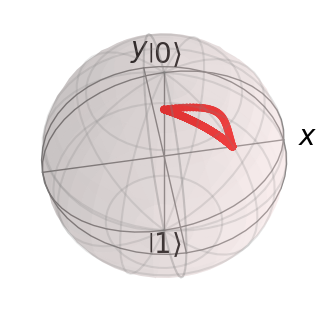

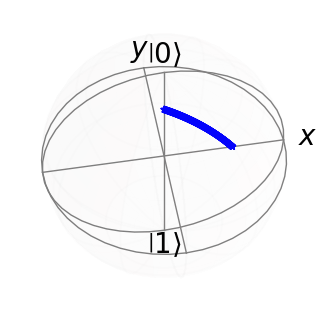

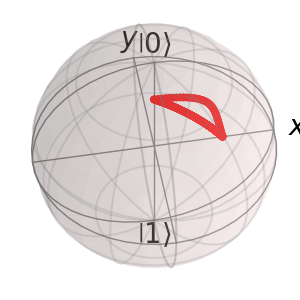

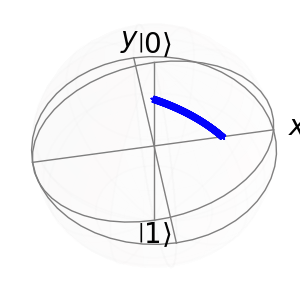

In [12]:
#improve plots

b.show()
newbloch.show()

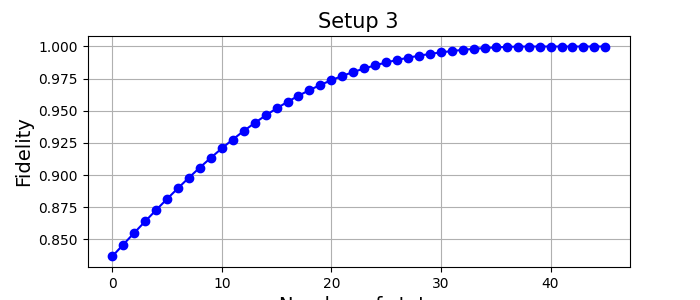

In [13]:
# data
xaxis = [i for i in range(len(finalestados))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, listfidelities, '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 3)

# show the plot
plt.show()

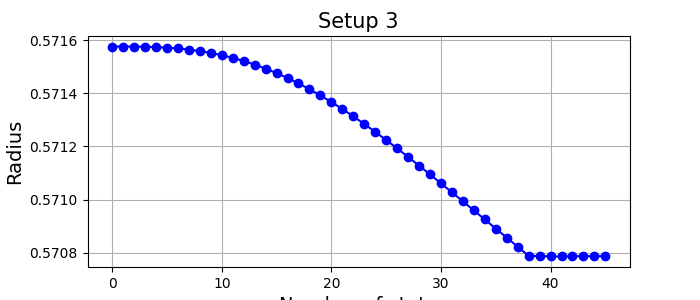

In [14]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,radius , '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Radius',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 3)

# show the plot
plt.show()

In [15]:
len(finaltiempotot)

46

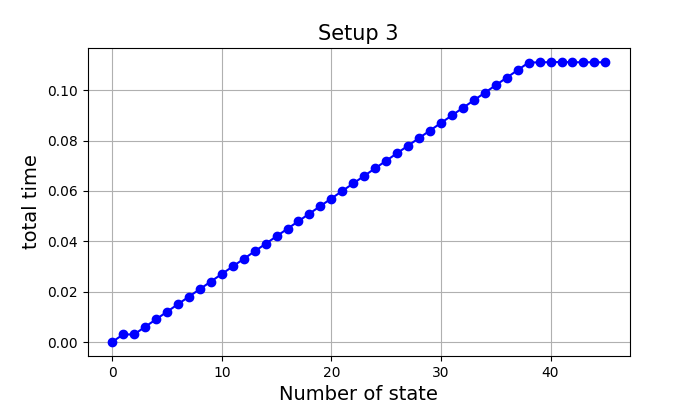

In [16]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,finaltiempotot, '-o', color='blue')

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('total time',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)

# show the plot
plt.show()

In [17]:
print(list_lambda_time[0:5])
print(vec_lambda[0:10])
len(list_lambda_time)

[56802.6919754144, 87498.7884765970, 107774.884162520, 116859.725823741, 118797.003876168]
[0.0, 52.4340870325596, 52.5572179198582, 52.8336356714591, 53.2623490524954, 53.8442720206397, 54.5822166282576, 55.4809381010381, 56.5472337419518, 57.7900996588133]


7

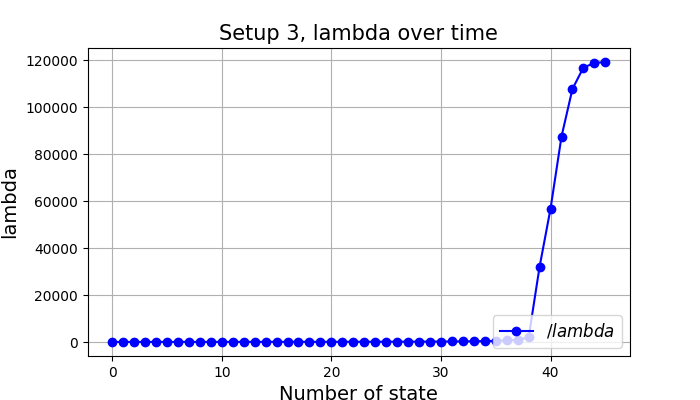

In [18]:
list_lambda =  vec_lambda+list_lambda_time
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, list_lambda[0:len(xaxis)], '-o', color='blue',label="$/lambda$")



#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('lambda',fontsize=14)
ax.set_title('Setup 3, lambda over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

## Testing with intermediary states

In the following cells we are going to use the geodesic that will give us some intermediary states in order to improve the control methodology

In [19]:
# Test values
#del(estadoslist, tiempolists, solution)
#qsri = 1/np.sqrt(3)*np.array([1.0, 1.0, 0.9])
#qssf = np.array([0.0, 0.9, 0.0])
qsri = 1/np.sqrt(3)*np.array([0.0, 0.0, 0.99])
qssf = 1/np.sqrt(3)*np.array([0.99, 0.0, 0.0])
fidelity_initial = fidelity(qsri,qssf)
w0 = 5
gamma_0 = 0.01
gamma_c = 10
Nmax = 50 ### with 20 is not working
imax = 7
deltat = 0.003

# Save initial and final states
auxri = qsri
auxsf = qssf

In [20]:
#numinter = 4 #number of intermediary states

numinter = 6 #number of intermediary states

#get the intermediary states from the geodesic
intermediaryqs=[geodesic((i)/(numinter-1),qsri,qssf) for i in range(numinter)]
intermediary = [bloch_vector(intermediaryqs[i]) for i in range(len(intermediaryqs)) ]
k = 1.0e-6
for i in range(numinter):
    delete_less_than_k(intermediary[i],k)

In [21]:
intermediary

[array([0.        +0.j, 0.        +0.j, 0.57157677+0.j]),
 array([0.12806466+0.j, 0.        +0.j, 0.47745337+0.j]),
 array([0.25259039+0.j, 0.        +0.j, 0.37013604+0.j]),
 array([0.37013604+0.j, 0.        +0.j, 0.25259039+0.j]),
 array([0.47745337+0.j, 0.        +0.j, 0.12806466+0.j]),
 array([0.57157677+0.j, 0.        +0.j, 0.        +0.j])]

In [22]:
solestes =[]
soltimes=[]
auxtime = 0.0
list_lambda = list([])
for i in range(numinter-1):
#for i in range(3):
    #print("run",i)
    estadoslist, tiempolists, solution, lambdavec = control1setup3_int_states(qsri,intermediary[i+1],fidelity_initial,Nmax=Nmax,initime=auxtime)
    #print(estadoslist)
    solestes=solestes+estadoslist
    soltimes=soltimes+tiempolists
    qsri=estadoslist[-1]
    #print(tiempolists[-1])
    auxtime=tiempolists[-1]
    list_lambda=list_lambda+lambdavec

## Using the $i_{max}$ loop and intermediary states

In [23]:
estadoslist=solestes ## reuse the varaible 
tiempolists = soltimes ## reuse the variable
solestes, soltimes, vec_lambda_time=get_time_fidelity(estadoslist,tiempolists,solution,imax,qssf)
list_lambda = list_lambda + vec_lambda_time

Find time with fidelity
New quantum state [0.56752506 0.06055673 0.01462975]
Find time with fidelity
New quantum state [0.5698863  0.03356352 0.00093307]
Find time with fidelity
New quantum state [5.70593282e-01 1.68150965e-02 1.29212495e-06]
Find time with fidelity
New quantum state [5.70762230e-01 8.40936600e-03 2.33999024e-10]
Find time with fidelity
New quantum state [ 5.70800266e-01  4.20589864e-03 -4.18800755e-14]
Find time with fidelity
New quantum state [5.70807661e-01 2.10411404e-03 6.79013802e-17]
Find time with fidelity
New quantum state [ 5.70808427e-01  1.05323498e-03 -5.37706975e-19]


In [24]:
list_lambda

[254.965668123051,
 310.696136864111,
 391.154355199406,
 506.844985382308,
 161.572950464016,
 177.886619625574,
 197.666640618892,
 221.815323136889,
 251.413176469551,
 287.603736349968,
 331.230422561284,
 130.229136104050,
 140.298552196269,
 152.185746537490,
 166.334368500267,
 183.331357649126,
 203.960938410080,
 229.279702830994,
 260.718507866800,
 300.213021269199,
 119.564697262499,
 129.344062927284,
 140.955533355820,
 154.891047355760,
 171.828913904014,
 192.727402215776,
 218.980013603114,
 252.685740299564,
 297.148503526049,
 357.873571739372,
 129.100617404805,
 142.620259620478,
 159.001133146916,
 179.114812646288,
 204.205169611123,
 236.110471200472,
 277.675980797279,
 333.591401945383,
 551.118509383090,
 1041.66146947558,
 2080.68435345438,
 4158.87128537732,
 8301.34954164559,
 16481.8608983193,
 32076.4721028448]

In [25]:
### for plots using intermediary states

# radius and fidelities
radiusint = [np.sqrt((solestes[i][0])**2+(solestes[i][1])**2+(solestes[i][2])**2) for i in range(len(solestes))]
listfidelitiesint=[fidelity(solestes[i],qssf) for i in range(len(solestes))]

In [26]:
listfidelitiesint

[0.83665,
 0.8545968163198765,
 0.8627120772623603,
 0.8627120772623603,
 0.879356726633366,
 0.8871096432040427,
 0.894401817042093,
 0.901162776047342,
 0.9073094909333612,
 0.9073094909333612,
 0.9212665825954626,
 0.9276935569403062,
 0.9337396198144781,
 0.9393974101143159,
 0.9446602110599351,
 0.9495202069420288,
 0.953966106097128,
 0.953966106097128,
 0.9636535769975232,
 0.967958502356987,
 0.9719222538896577,
 0.9755602540328709,
 0.9788880766019744,
 0.9819198296329088,
 0.9846659675709131,
 0.9871303723714245,
 0.9871303723714245,
 0.9914161815319795,
 0.9931120471759927,
 0.9945548197324765,
 0.9957772262436817,
 0.9968093074216219,
 0.9976765980189057,
 0.9990255590940568,
 0.9997173807090928,
 0.9999290057769605,
 0.9999820862011295,
 0.9999953567529415,
 0.9999986744029767,
 0.9999995037989768]

In [27]:
### fidelity using intermediary states

fide_inter_1 = [fidelity(solestes[i],intermediary[1]) for i in range(len(solestes))]
fide_inter_2 = [fidelity(solestes[i],intermediary[2]) for i in range(len(solestes))]
fide_inter_3 = [fidelity(solestes[i],intermediary[3]) for i in range(len(solestes))]
fide_inter_4 = [fidelity(solestes[i],intermediary[3]) for i in range(len(solestes))]

## Plots using intermediary states and setup 3

In [28]:
### plots

### bloch sphere
length = 1
nrm = mpl.colors.Normalize(0,length)
#colors = cm.winter(nrm(range(length))) # options: cool, summer, winter, autumn etc.
colors = cm.winter(range(length)) # options: cool, summer, winter, autumn etc.

b = qutip.Bloch(view=[170,10],figsize=[3,3])
b.sphere_alpha=0.2
b.point_color = ['r'] # options: 'r', 'g', 'b' etc.
b.point_marker = ['o']
b.point_size = [20]
for i in range(len(solestes)):
    b.add_points(solestes[i])
    
## ploting geodesic
Numbergeo = 250
geolist = [geodesic(t/Numbergeo,auxri,qssf) for t in range(Numbergeo+1)]
colors2 = cm.cool(nrm(range(length))) # options: cool, summer, winter, autumn etc.

vectorgeo = [bloch_vector(rho) for rho in geolist]
#b.point_color = ['b'] # options: 'r', 'g', 'b' etc.
#b.point_marker = ['*']
#b.point_size = [20]
#for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
#    b.add_points(vectorgeo[i])

#b.add_points(auxri)
#b.add_points(auxsf)
newbloch=qutip.Bloch(view=[170,30],figsize=[3,3])
newbloch.point_color = ['b'] # options: 'r', 'g', 'b' etc.
newbloch.point_marker = ['*']
newbloch.point_size = [20]
newbloch.sphere_alpha=0.01
newbloch.frame_alpha=0.01
#newbloch.
for i in range(len(vectorgeo)):
    #b.point_color = list(colors2) # options: 'r', 'g', 'b' etc.
    newbloch.add_points(vectorgeo[i],'s')

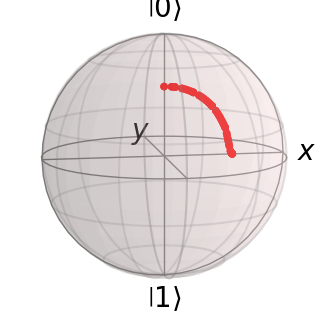

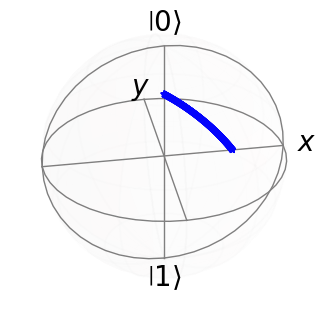

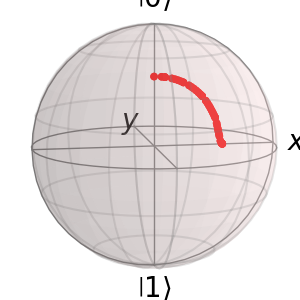

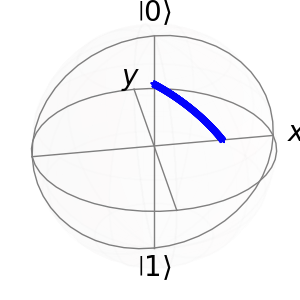

In [29]:
#improve plots
b.show()
newbloch.show()

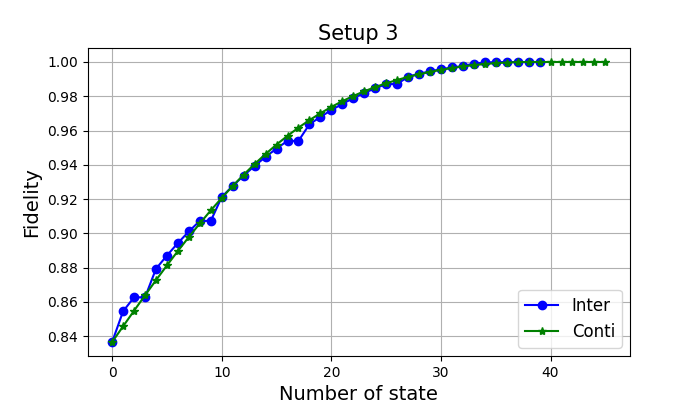

In [30]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, listfidelitiesint, '-o', color='blue',label="Inter")

#####################

# data without intermediary states
xaxis1 = [i for i in range(len(finalestados))]
ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

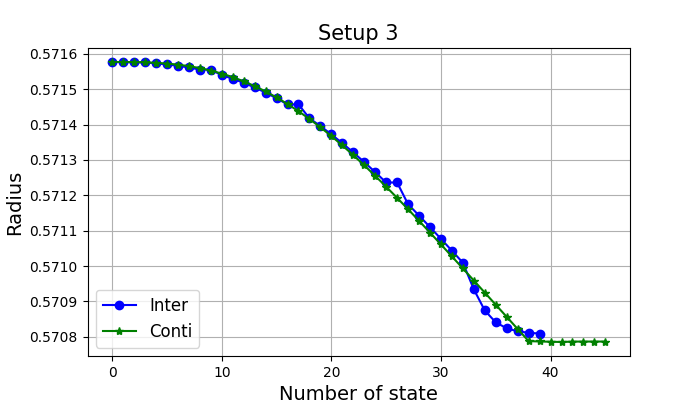

In [31]:
# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis,radiusint, '-o', color='blue',label="Inter")
ax.plot(xaxis1, radius, '-*', color='green',label="Conti")

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Radius',fontsize=14)
ax.set_title('Setup 3',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower left')
# show the plot
plt.show()

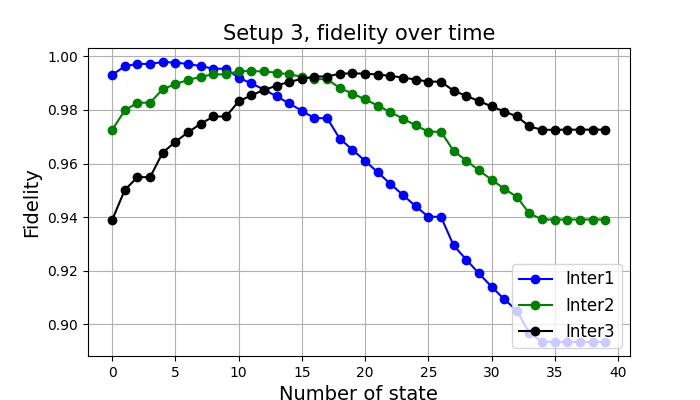

In [32]:
# data
xaxis = [i for i in range(len(solestes))]

# create a figure and axes
fig, ax = plt.subplots()

# plot the data
ax.plot(xaxis, fide_inter_1, '-o', color='blue',label="Inter1")
ax.plot(xaxis, fide_inter_2, '-o', color='green',label="Inter2")
ax.plot(xaxis, fide_inter_3, '-o', color='black',label="Inter3")


#####################

# data without intermediary states
#xaxis1 = [i for i in range(len(finalestados))]
#ax.plot(xaxis1, listfidelities, '-*', color='green',label="Conti")
#########################

# add labels and title
ax.set_xlabel('Number of state',fontsize=14)
ax.set_ylabel('Fidelity',fontsize=14)
ax.set_title('Setup 3, fidelity over time',fontsize=15)
plt.grid()
fig = plt.gcf()
fig.set_size_inches(7, 4)
plt.legend(fontsize=12,loc='lower right')
# show the plot
plt.show()

In [ ]:
list_lambda